In [2]:
import os
os.chdir('..') # go back to the root directory

import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import json
import glob
import random
from btbench_config import *
from braintreebank_subject import Subject
from btbench_datasets import BrainTreebankSubjectTrialBenchmarkDataset
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'figures/font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'

In [3]:
all_subject_trials = [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (6, 0), (6, 1), (6, 4), (7, 0), (7, 1), (8, 0), (9, 0), (10, 0), (10, 1)]
all_subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for subject_id in all_subjects:
    subject = Subject(subject_id, cache=False)
    print("Subject %d has %d electrodes" % (subject_id, len(subject.electrode_labels)))

FileNotFoundError: [Errno 2] No such file or directory: 'braintreebank/localization/sub_1/depth-wm.csv'

In [2]:
subject_id, trial_id = 3, 2
subject = Subject(subject_id, cache=False)
subject.load_neural_data(trial_id)
dataset = BrainTreebankSubjectTrialBenchmarkDataset(subject, trial_id, dtype=torch.float32, eval_name="rms") # eval_name can be "pitch", "rms", "onset", or "speech"
all_words_df = dataset.all_words_df

all_words_df["neural_data_time"] = all_words_df["est_idx"] / SAMPLING_RATE
all_words_df = all_words_df[['text', 'start', 'rms', 'pitch', 'max_mean_pixel_brightness', 'face_num', 'neural_data_time']]
all_words_df = all_words_df.iloc[1049:1054]
all_words_df

,text,start,rms,pitch,max_mean_pixel_brightness,face_num,neural_data_time
1049,The,1298.190,0.033887,49.477501,33.194789,0.0,1482.999512
1050,horsemen,1298.271,0.030576,52.447266,33.164250,0.0,1483.081055
1051,took,1298.950,0.023497,62.408077,32.930059,0.0,1483.766113
1052,your,1299.230,0.027601,53.306385,32.802667,0.0,1484.041992
1053,lands,1299.381,0.021372,54.055378,32.711491,0.0,1484.187500


In [101]:
# this cell is just for testing and verifying pitch makes sense
all_words_df_test = dataset.all_words_df
all_words_df_test["neural_data_time"] = all_words_df_test["est_idx"] / SAMPLING_RATE
all_words_df_test = all_words_df_test[['text', 'start', 'rms', 'pitch', 'max_mean_pixel_brightness', 'face_num', 'neural_data_time']]
all_words_df_test = all_words_df_test.iloc[1080:]
all_words_df_test.head(50)

,text,start,rms,pitch,max_mean_pixel_brightness,face_num,neural_data_time
1080,have,1314.990000,0.027449,58.857964,67.889907,4.0,1499.809082
1081,only,1315.218754,0.026147,59.139751,67.889907,1.0,1500.028320
1082,to,1315.776358,0.019892,49.144447,72.201485,2.0,1500.585449
1083,remove,1315.901917,0.021082,41.901798,65.720472,2.0,1500.711426
1084,those,1316.722045,0.017692,63.925533,64.499729,1.0,1501.527344
1085,who,1317.422524,0.014925,60.065372,77.990511,1.0,1502.229980
1086,oppose,1317.572524,0.018144,58.956280,77.775600,2.0,1502.387207
1087,us,1318.227157,0.015636,73.088837,74.693282,2.0,1503.032715
1088,It,1320.383546,0.017961,80.294266,88.734374,3.0,1505.187500
1089,will,1320.483546,0.017773,81.392899,90.248117,3.0,1505.306152


In [124]:
# this cell is just for testing and verifying pitch makes sense
all_words_df_test = dataset.all_words_df
all_words_df_test["neural_data_time"] = all_words_df_test["est_idx"] / SAMPLING_RATE
all_words_df_test = all_words_df_test[['speaker']]
all_words_df_test = all_words_df_test.iloc[1080:]
all_words_df_test['speaker'].value_counts().index

Index(['Gandalf the white', 'Samwise "Sam" Gamgee', 'Theoden', 'Treebeard',
       'Frodo Baggins', 'Faramir', 'Gollum', 'Gimli', 'Grima "Wormtongue"',
       'Aragorn "Strider"', 'Meriadoc "Merry" Brandybuck', 'Eowyn',
       'Peregrin "Pippin" Took', 'Eomer', 'Smeagol', 'Denethor', 'Elrond',
       'Aragorn', 'Galadriel', 'Legolas', 'Saruman', 'Gollum / Smeagol',
       'Boromir', 'Madril', 'Arwen', 'Gamling', 'Hama', 'orc', 'Morwen',
       'Haldir', 'uruk-hai leader', 'orc 2', 'Haleth', 'Freda',
       'Samwise "Sam" Gamgee * Gollum', 'soldier', 'stablehand 2', 'uruk-hai',
       'orc 1', 'Malamir', 'Sharku', 'Aragorn * soldier', 'Gimli * Legolas',
       'Theoden / Saruman', 'boy', 'Bereg', 'woman', 'man', 'rohan rider 1',
       'Samwise "Sam" Gamgee * Frodo Baggins', 'Aragorn * Theoden',
       'soldier 1', 'Peregrin "Pippin" Took * Meriadoc "Merry" Brandybuck',
       'Malamir * Faramir', '* multiple speakers', 'soldier 2',
       'Freda * Morwen', 'Frodo Baggins * Faramir', 'E

In [83]:
import numpy as np
show_n_electrodes = 4
show_electrodes = np.random.choice(subject.electrode_labels, show_n_electrodes)

window_from = int(1481.8 * SAMPLING_RATE)
window_to = int(1485.2 * SAMPLING_RATE)

neural_data = []
for electrode_label in show_electrodes:
    neural_data.append(subject.get_electrode_data(electrode_label, trial_id, window_from=window_from, window_to=window_to))
neural_data = np.array(neural_data)

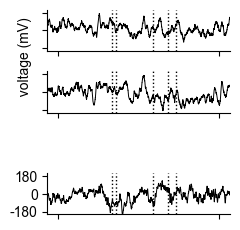

In [85]:
fig, axes = plt.subplots(show_n_electrodes, 1, figsize=(2.5, .6*show_n_electrodes), gridspec_kw={'height_ratios': [1, 1, 0.5, 1]})
time = np.arange(window_from, window_to) / SAMPLING_RATE

for i in range(show_n_electrodes):
    if i == 2:
        axes[i].axis('off')
        continue
    axes[i].plot(time, neural_data[i], linewidth=.7, color='black')
    axes[i].set_ylabel(f'')
    #axes[i].set_xlim(time[0], time[-1])
    axes[i].set_xlim(window_from/SAMPLING_RATE, window_to/SAMPLING_RATE)
    axes[i].set_ylim(-210, 210)
    axes[i].set_yticks([-180, 0, 180])
    axes[i].set_yticklabels([])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(True)
    axes[i].spines['left'].set_visible(True)
    _percent_time = (window_to - window_from) * 0.05 / SAMPLING_RATE
    axes[i].set_xticks([window_from/SAMPLING_RATE+_percent_time, window_to/SAMPLING_RATE-_percent_time])
    axes[i].set_xticks([1482, 1485])
    axes[i].set_xticklabels([])
    # Add vertical lines for word onsets
    for _, row in all_words_df.iterrows():
        axes[i].axvline(x=row['neural_data_time'], color='black', linestyle=':', alpha=1, linewidth=1)

    if i == 1:
        axes[i].set_ylabel('                  voltage (mV)')

axes[-1].set_yticklabels([-180, 0, 180])
#axes[-1].set_xlabel('time (seconds)')



plt.tight_layout()
plt.savefig('figures/example_neural_data.pdf', bbox_inches='tight', dpi=300)

/tmp/ipykernel_64873/3301783637.py:22: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(min(all_words_df[feature]) - feature_range*0.3, max(all_words_df[feature]) + feature_range*0.3)
/tmp/ipykernel_64873/3301783637.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


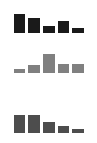

In [96]:
all_words_df

features = ['rms', 'pitch', 'face_num', 'max_mean_pixel_brightness']

fig, axes = plt.subplots(len(features), 1, figsize=(1, 1.6), gridspec_kw={'height_ratios': [1, 1, .1, 1], 'hspace': 1})

colors = ['#1a1a1a', '#808080', '#fff', '#4d4d4d']  # Dark to light gray shades
x_values = np.arange(len(all_words_df))

for i, (feature, ax) in enumerate(zip(features, axes)):
    # Plot bars
    if i != 2:
        ax.bar(x_values, all_words_df[feature], color=colors[i], width=0.8)
    
    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Only keep left and bottom spines
    ax.axis('off')
    feature_range = max(all_words_df[feature]) - min(all_words_df[feature])
    ax.set_ylim(min(all_words_df[feature]) - feature_range*0.3, max(all_words_df[feature]) + feature_range*0.3)
    # Set xlim to match the neural data plot
    #ax.set_xlim(window_from/SAMPLING_RATE, window_to/SAMPLING_RATE)

plt.tight_layout()
plt.savefig('figures/example_features.pdf', bbox_inches='tight', dpi=300)
